Program służy do analizy wyników wypluwanych przez program Wojtka

In [1]:
import matplotlib.pyplot as plt
import numpy as np


def plotG2FromFile(label,fileName):
    x_and_G2 = np.genfromtxt("./data/cov_"+fileName,delimiter='\t')
    xs = np.abs(x_and_G2[:,0])
    G2s = x_and_G2[:,1]
    
    energy = np.genfromtxt("./data/energies_"+fileName,delimiter='\t')[0]
    
    plt.plot(xs,G2s,label=label+" (E= "+str(round(energy, 2))+")")


plt.figure(figsize=[8,6])
####################################################
N="2"
plotG2FromFile("Add=-0.00","n"+N+"_pmax100_ptot0_A0.250000_ADD-0.000000_sigma0.050000_r0.000000_neig1_m150.txt")
#plotG2FromFile("Add=-0.03","n"+N+"_pmax100_ptot0_A0.250000_ADD-0.030000_sigma0.050000_r0.000000_neig1_m150.txt")
#plotG2FromFile("Add=-0.035","n"+N+"_pmax100_ptot0_A0.250000_ADD-0.035000_sigma0.050000_r0.000000_neig1_m150.txt")
#plotG2FromFile("Add=-0.04","n"+N+"_pmax100_ptot0_A0.250000_ADD-0.040000_sigma0.050000_r0.000000_neig1_m150.txt")
#plotG2FromFile("Add=-0.1","n"+N+"_pmax100_ptot0_A0.250000_ADD-0.100000_sigma0.050000_r0.000000_neig1_m150.txt")
#plotG2FromFile("Add=-0.2","n"+N+"_pmax100_ptot0_A0.250000_ADD-0.200000_sigma0.050000_r0.000000_neig1_m150.txt")
#plotG2FromFile("Add=-0.3","n"+N+"_pmax100_ptot0_A0.250000_ADD-0.300000_sigma0.050000_r0.000000_neig1_m150.txt")
####################################################
plt.grid()
plt.title("N="+N+", g=100 (A=0.25), σ=0.05, L=1, V=dipolowe")
plt.xlabel("x-x'")
plt.ylabel("G2(x,x')")
plt.legend()
plt.savefig("G2_N2.png")
plt.show()

In [2]:
# plt.figure(figsize=[8,6])
# ####################################################
# Add = "-0.000000"
# plotG2FromFile("N=2","n2_pmax100_ptot0_A0.250000_ADD"+Add+"_sigma0.050000_r0.000000_neig1_m150.txt")
# plotG2FromFile("N=3","n3_pmax80_ptot0_A0.250000_ADD"+Add+"_sigma0.050000_r0.000000_neig1_m250.txt")
# plotG2FromFile("N=4","n4_pmax60_ptot0_A0.250000_ADD"+Add+"_sigma0.050000_r0.000000_neig1_m250.txt")
# ####################################################
# plt.grid()
# plt.title("Add="+Add+", g=100 (A=0.25), σ=0.05, L=1, V=dipolowe")
# plt.xlabel("x-x'")
# plt.ylabel("G2(x,x')")
# plt.legend()
# plt.savefig("G2_Add-0.00.png")
# plt.show()


In [3]:
def getDMRGData(fileName):
    dataDMRG = open("/home/maciej/IKW_3M/MAGISTERKA/Aktualne3/M96_diagramData/"+fileName,"r").read().splitlines()[-1].split()

    N = int( fileName.split('_N')[1].split('_')[0] )
    M = int( fileName.split('_M')[1].split('_')[0] )
    g = float( fileName.split('g')[1].split('_')[0] )
    gdd = g*float( fileName.split('_fdd')[1].split('_')[0] )
    mu = M**2+(57.079*gdd-g*M)/2
    Ni = []
    G2s = []
    Xs = []
    
    
    E = float(dataDMRG[dataDMRG.index("H=")+1])+ mu*float(N)
    startNi = dataDMRG.index("Ni=")+1
    startNcNi = dataDMRG.index("NcNi=")+1

    for i in range(M):
        Ni.append(float(dataDMRG[startNi+i]))
        if i == int(M/2)-1:
            G2s.append( (float(dataDMRG[startNcNi+i])-Ni[i])*M**2 )
        else:
            G2s.append(float(dataDMRG[startNcNi+i])*M**2)
        Xs.append(-0.5+float(i+1)/float(M))
    
    return [Xs,Ni,G2s,E]

def plotG2FromDMRG(label,fileName):
    [Xs,Ni,G2s,energy] = getDMRGData(fileName)
    
    plt.plot(Xs,G2s,'_',linewidth=4,label=label+" (E= "+str(round(energy, 2))+")")
    
def plotRhoFromDMRG(label,fileName):
    [Xs,Ni,G2s,energy] = getDMRGData(fileName)
    
    plt.plot(Xs,[ni*float(len(Ni))*float(sum(Ni))  for ni in Ni],'_',linewidth=4,label=label+" (E= "+str(round(energy, 2))+")")
##############################
#[Xs,Nc,G2s] = getDMRGData("g100.00_fdd0.000_M96_N2__")
#plt.plot(Xs,G2s)
###############################

In [4]:
plt.figure(figsize=[8,6])
gdd = "90"
####################################################
plotG2FromDMRG("DMRG","g100.00_fdd0."+gdd+"0_M96_N4__")
# name = "n4_pmax10_ptot0_neig1_m150_g100.000000_gdd"+gdd+".000000_sigma0.005000"
# plotG2FromFile("ED10",name+"_"+name+".txt")
# name = "n4_pmax20_ptot0_neig1_m150_g100.000000_gdd"+gdd+".000000_sigma0.005000"
# plotG2FromFile("ED20",name+"_"+name+".txt")
# name = "n4_pmax30_ptot0_neig1_m250_g100.000000_gdd"+gdd+".000000_sigma0.005000"
# plotG2FromFile("ED30",name+"_"+name+".txt")
name = "n4_pmax40_ptot0_neig1_m250_g100.000000_gdd"+gdd+".000000_sigma0.005000"
plotG2FromFile("ED_pmax40",name+"_"+name+".txt")
# name = "n4_pmax50_ptot0_neig1_m250_g100.000000_gdd"+gdd+".000000_sigma0.005000"
# plotG2FromFile("ED50",name+"_"+name+".txt")
# name = "n4_pmax60_ptot0_neig1_m350_g100.000000_gdd"+gdd+".000000_sigma0.005000"
# plotG2FromFile("ED60",name+"_"+name+".txt")
name = "n4_pmax70_ptot0_neig1_m350_g100.000000_gdd"+gdd+".000000_sigma0.005000"
plotG2FromFile("ED_pmax70",name+"_"+name+".txt")
# name = "n4_pmax80_ptot0_neig1_m350_g100.000000_gdd"+gdd+".000000_sigma0.005000"
# plotG2FromFile("ED80",name+"_"+name+".txt")
# name = "n4_pmax90_ptot0_neig1_m450_g100.000000_gdd"+gdd+".000000_sigma0.005000"
# plotG2FromFile("ED90",name+"_"+name+".txt")
name = "n4_pmax100_ptot0_neig1_m450_g100.000000_gdd"+gdd+".000000_sigma0.005000"
plotG2FromFile("ED_pmax100",name+"_"+name+".txt")
name = "n4_pmax110_ptot0_neig1_m450_g100.000000_gdd"+gdd+".000000_sigma0.005000"
plotG2FromFile("ED_pmax110",name+"_"+name+".txt")
####################################################
plt.grid()
#plt.title("Add="+Add+", g=100 (A=0.25), σ=0.005, L=1, V=dipolowe")
plt.xlabel("x-x'")
plt.ylabel("G2(x,x')")
plt.legend()
plt.savefig("images/G2_N4_DMRG_vs_ED_2.png")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/maciej/IKW_3M/MAGISTERKA/Aktualne3/M96_diagramData/g100.00_fdd0.900_M96_N4__'

<Figure size 800x600 with 0 Axes>

Tutaj porównujemy wyniki z ED z wynikami dla WellV oblicoznymi analitycznie dla 2 cząstek

In [76]:
#Tu jest kod funkcji
import scipy.optimize as optimize
import scipy
import numpy as np
import matplotlib.pyplot as plt

import cmath as cm

def argTan(E,V,a,g):
    α3 = cm.sqrt(-E-V)
    return cm.sqrt(E+V)*a-0.5*np.imag(cm.log( (2*α3-g)/(2*α3+g) ))

def argTanMinusPiSecondMinusPiN(E,V,a,g,n):
    return np.real(argTan(E,V,a,g) - cm.pi/2 - cm.pi*n)

def findEsInRangeWhereTanIsInfty(V,a,g):
    outEs = []
    for n in range(0,1000):
        newE = optimize.bisect(argTanMinusPiSecondMinusPiN,-10*V,10*V,args=(V,a,g,n))
        if newE > -V and newE <= 0:
           outEs.append(newE)
        else:
            break
            
    for n in range(-1,-1000):
        newE = optimize.bisect(argTanMinusPiSecondMinusPiN,-10*V,10*V,args=(V,a,g,n))
        if newE > -V and newE <= 0:
           outEs.append(newE)
        else:
            break
    outEs.sort()
    return outEs

def func(E,V,a,g,L):
    C1 = cm.tan( argTan(E=E,V=V,a=a,g=g) )
    C2 = cm.sqrt(-E/(E+V))
    C3 = cm.tanh( cm.sqrt(-E)*(L/2-a) )
    if np.abs(np.imag(C1-C2*C3)) > 0.001:
        print("UWAGA 1!!!!!!!!!!!!!!!!!!!!!!!")
    return np.real(C1-C2*C3)

def findIntervalsContainingOneEnergy(V,a,g,L):
    points = findEsInRangeWhereTanIsInfty(V=V,a=a,g=g)
    if len(points)==0 and  func(E=-0.999*V,V=V,a=a,g=g,L=L)*func(E=-0.001,V=V,a=a,g=g,L=L) < 0.0:
        points.append(-0.999*V)
        points.append(-0.001)
    elif len(points)==1:
        if func(E=-0.999*V,V=V,a=a,g=g,L=L)*func(E=1.001*points[0],V=V,a=a,g=g,L=L) < 0.0: #UWAGA NA 0.999 - CHYBA WYSTARCZY, ale mogą byc problemy
            points.append(-0.999*V)
            points.sort()
        if func(E=-0.001,V=V,a=a,g=g,L=L)*func(E=0.999*points[0],V=V,a=a,g=g,L=L) < 0.0: #UWAGA NA 0.999 - CHYBA WYSTARCZY, ale mogą byc problemy
            points.append(-0.001)
            points.sort()
    elif len(points) >=2:
        if func(E=-0.999*V,V=V,a=a,g=g,L=L)*func(E=1.001*points[0],V=V,a=a,g=g,L=L) < 0.0: #UWAGA NA 0.999 - CHYBA WYSTARCZY, ale mogą byc problemy
            points.append(-0.999*V)
            points.sort()
        if func(E=-0.001,V=V,a=a,g=g,L=L)*func(E=0.999*points[-1],V=V,a=a,g=g,L=L) < 0.0: #UWAGA NA 0.999 - CHYBA WYSTARCZY, ale mogą byc problemy
            points.append(-0.001)
            points.sort()    
    points.sort()
    return points

def findBoundStatesEnergies(V,a,g,L):
    intervals = findIntervalsContainingOneEnergy(V=V,a=a,g=g,L=L)
    outEnergies = []
    for n in range(0,len(intervals)-1):
        outEnergies.append( optimize.bisect(func,0.999*intervals[n],1.001*intervals[n+1],args=(V,a,g,L)) )
    outEnergies.sort()
    return outEnergies

def calculateCoefs(V,a,g,L,n=0): #n=0 dla GS
    E = findBoundStatesEnergies(V,a,g,L)[n]
    
    α3 = cm.sqrt(-E-V)
    α4 = cm.sqrt(-E)
    A3 = findA3(E=E,V=V,a=a,g=g,L=L)
    A4 = A3 * ( cm.exp(α3*a) + (2*α3-g)/(2*α3+g)*cm.exp(-α3*a) ) / (cm.exp(α4*a)+cm.exp(α4*(L-a)))
    B3 = A3 * (2*α3-g)/(2*α3+g)
    B4 = A4 * cm.exp(α4*L)
    return [E,α3,α4,A3,B3,A4,B4]

def funcNorm(A3,E,V,a,g,L):
    α3 = cm.sqrt(-E-V)
    α4 = cm.sqrt(-E)
   # A4 = A3 * ( cm.exp(α3*a) + (2*α3-g)(2*α3+g)*cm.exp(-α3*a) ) / (cm.exp(α4*a)+cm.exp(α4*(L-a)))
    A4 = A3 * ( cm.exp(α3*a) + (2*α3-g)/(2*α3+g)*cm.exp(-α3*a) ) / (cm.exp(α4*a)+cm.exp(α4*(L-a)))
    B3 = A3 * (2*α3-g)/(2*α3+g)
    B4 = A4 * cm.exp(α4*L)
    
    if np.abs(np.real(α3)) < 0.001 and np.abs(np.imag(α4)) < 0.001: #bound states
        C1 = np.real( A3*np.conj(B3)/α3 *(cm.exp(2*α3*a)-1) )
        C2 = np.abs(A4)**2/α4*( cm.exp(α4*L)-cm.exp(2*α4*a))
        C3 = np.abs(B4)**2/α4*( cm.exp(-α4*L)-cm.exp(-2*α4*a))
        return np.real( C1+C2-C3-1 )
    if np.abs(np.real(α3)) < 0.001 and np.abs(np.real(α4)) < 0.001: #bound states
        C1 = A3*np.conj(B3)/α3 *(cm.exp(2*α3*a)-1) 
        C2 = A4*np.conj(B4)/α4 *(cm.exp(α4*L)-cm.exp(2*α4*a)) 
        return np.real( C1 + C2  - 1 )
    print("ERROR!")
    return 0.0

def findA3(E,V,a,g,L):
    return optimize.bisect(funcNorm,0.0,1E+4,args=(E,V,a,g,L))

def varphi_C(y,coefs,a):
    [E,α3,α4,A3,B3,A4,B4] = coefs
    
    y = ((y+L/2) % L) - L/2 #PBC
    if y < -a:
        return B4*cm.exp(α4*y) + A4*cm.exp(-α4*y)
    if y >= -a and y < 0:
        return B3*cm.exp(α3*y) + A3*cm.exp(-α3*y)
    if y >= 0 and y < a:
        return A3*cm.exp(α3*y) + B3*cm.exp(-α3*y)
    if y >= a:
        return A4*cm.exp(α4*y) + B4*cm.exp(-α4*y)
    
def calculateGroundStateAnalitycaly(L,a,V,g):
    coefs = calculateCoefs(V=V,a=a,g=g,L=L,n=0)
    ys = np.arange(-L/2,L/2+1e-4,2e-3)

    varphi_QW = []
    varphi_QV_Norm  =0.0
    for y in ys:
        varphi_QW.append( varphi_C(y,coefs,a=a) )
        varphi_QV_Norm += np.abs( varphi_C(y,coefs,a=a) )**2 * (ys[1]-ys[0])

    varphi_QW = [y/np.sqrt(varphi_QV_Norm) for y in varphi_QW]
    E = coefs[0]
    return [E,ys,varphi_QW]

In [77]:
# tutaj mamy jeż wizualizację
[E,ys,varphi_QW] = calculateGroundStateAnalitycaly(L=1,a=0.05*2,V=250,g=10)

plt.figure(figsize=[8,6])
plt.plot(ys, np.abs(varphi_QW)**2, label="Analityczne (E="+str(round(E,2))+")")
plotG2FromFile("ED","n2_pmax200_ptot0_g10.000000_vqw250.000000_aqw0.100000_neig1_m250.txt")

plt.grid()
plt.xlabel("$x-x'$")
plt.legend()
plt.show()

NameError: name 'L' is not defined

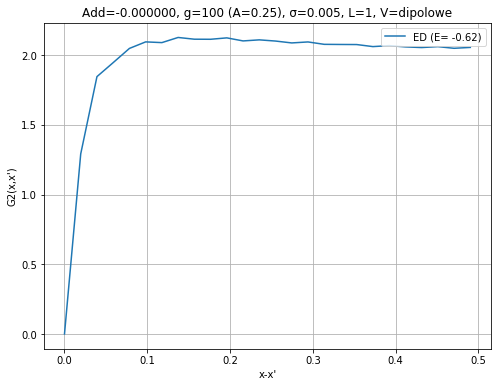

In [78]:
plt.figure(figsize=[8,6])
####################################################
plotG2FromFile("ED","n2_pmax100_ptot0_A0.250000_ADD-0.003800_sigma0.002500_r0.000000_neig1_m150.txt")
#plotG2FromFile("ED","n4_pmax60_ptot0_A0.250000_ADD-0.100000_sigma0.050000_r0.000000_neig1_m250.txt")
####################################################
plt.grid()
plt.title("Add="+Add+", g=100 (A=0.25), σ=0.005, L=1, V=dipolowe")
plt.xlabel("x-x'")
plt.ylabel("G2(x,x')")
plt.legend()
plt.savefig("G2_N4_DMRG_vs_ED_1.png")
plt.show()

A tutaj porównujemy ED z potencjałem Krzyśka z rozwinieciem go w bazie stanów LL dla N=2

In [79]:
import numpy as np
import math as m
from scipy import optimize


def func_q(q,I1,I2,L,c):
    return 2*m.pi*(I2-I1) - 4*m.atan(q/c) - L*q

def find_q(I1,I2,L,c):
    return optimize.bisect(func_q, -0.01, 2*m.pi*(I2-I1)/L,args=(I1,I2,L,c))

def find_Q(I1,I2,L):
    return m.pi*(I2+I1)/L
    
def find_ks(I1,I2,L,c):
    q = find_q(I1,I2,L,c)
    Q = find_Q(I1,I2,L)
    k1 = Q-q/2
    k2 = Q+q/2
    return [k1,k2]

def psi(x1,x2,a1,a2,k1,k2,L):
    x1=x1%L
    x2=x2%L
    if x2 >= x1:
        return a1*np.exp(1j*(k1*x1+k2*x2)) + a2*np.exp(1j*(k2*x1+k1*x2))
    return a1*np.exp(k1*x2+k2*x1) + a2*np.exp(k2*x2+k1*x1)

def psis(x1,x2s,I1,I2,L,c):
    [k1,k2] = find_ks(I1,I2,L,c)
    a1 = 1 - 1j*c/(k2-k1)
    a2 = 1 + 1j*c/(k2-k1)
    
    norm_sum = 0.0
    
    out = []
    for x2 in x2s:
        val = psi(x1,x2,a1,a2,k1,k2,L)
        out.append(val)
        norm_sum += val*np.conj(val)*(x2s[1]-x2s[0])
   # return out
    
    #print( 1/np.sqrt(norm_sum) )
    return [val/np.sqrt(norm_sum) for val in out]

def varphis(ys,I1,I2,L,c):
    return psis(x1=0,x2s=ys,I1=I1,I2=I2,L=L,c=c)

def energy_LL(I1,I2,L,c):
    q = find_q(I1=I1,I2=I2,L=L,c=c)
    return q**2/2

def vdd(u):
    if np.abs(u) > 30: #granica numeryczna
        return 0
    return (2*np.abs(u) - m.sqrt(2*m.pi)*(1+u**2)*m.exp(u**2/2)*m.erfc(np.abs(u)/m.sqrt(2)))/4

def vddσ(y,σ):
    return vdd(y/σ)/σ

def vddσs(ys,σ):
    out = []
    for y in ys:
        out.append( vddσ(y,σ))
    return out

def int_vddσs(ys,σ):
    out = 0.0
    for y in ys:
        out+= vddσ(y,σ)*(ys[1]-ys[0])
    return out

def Hmmp(vs, varphis_m, varphis_mp, dy, gdd):
    out = 0.0
    for i in range(len(vs)):
        out += vs[i]*np.conj(varphis_m[i])*varphis_mp[i]*dy
    return gdd*out

def ganerate_Hamiltonian(L,c,σ,M,gdd):
    ys = np.arange(-L/2, L/2+L/1e6,L/100)
    vs = vddσs(ys,σ)
    varphis_list = []
    for m in range(M):
        varphis_list.append( varphis(ys,I1=-0.5-m,I2=0.5+m,L=L,c=c) ) #UWAGA pomijamy co drugi stan!!!!!!!!!!!!!!!!!!
       # varphis_list.append( varphis(ys,I1=0.5+m,I2=-0.5,L=L,c=c) )
    H = np.zeros(shape=(M,M),dtype='complex')
    
    for m in range(M):
        for mp in range(m+1):
            H[m,mp] = Hmmp(vs,varphis_list[m],varphis_list[mp],ys[1]-ys[0],gdd)
            H[mp,m] = H[m,mp]
            
    for m in range(M):
        H[m,m] += energy_LL(I1=-0.5-m,I2=0.5+m,L=L,c=c)
    return H

def calculate_Eigens(L,c,σ,M,gdd):
    H = ganerate_Hamiltonian(L,c,σ,M,gdd)
    return np.linalg.eigh(H)

def ground_state(ys,L,c,σ,M,gdd):
    Es, Coefs = calculate_Eigens(L,c,σ,M,gdd)
    gsCoefs = np.real(Coefs[:,0])
    out = np.ndarray(len(ys), dtype=np.complex128)
    for i in range(len(out)):
        out[i] = 0.0
    
    #print(gsCoefs[0:4])
    
    for m in range(0,M):
       # line = varphis(ys,I1=0.5+m,I2=-0.5-m,L=L,c=c)
        line = varphis(ys,I1=-0.5-m,I2=0.5+m,L=L,c=c)
        #print(gsCoefs[m])
        for iy in range(len(ys)):
            out[iy] += float(gsCoefs[m])*line[iy] #i tak jest real, tylko aby bez warninga
    return Es[0], out

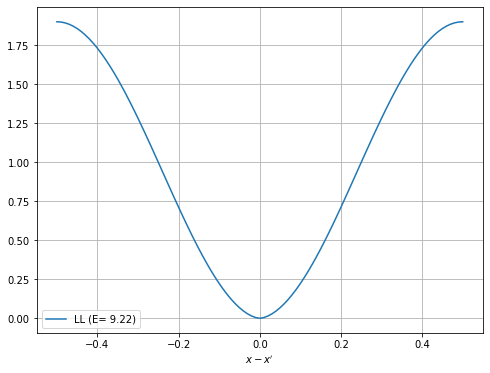

In [81]:
# a tu już liczymi i rysujemy Lieba
import matplotlib.pyplot as plt

ys = np.arange(-1/2, 1/2+1/1e6,1/100)
#Egs, varphi_LL = ground_state(ys,L=1,c=100,σ=0.05,M=50,gdd=71) #c == g, tylko energię podzielić przez 2
Egs, varphi_LL = ground_state(ys,L=1,c=1000,σ=0.01,M=80,gdd=100)
#Egs, varphi_LL = ground_state(ys,L=1,c=100,σ=0.05,M=80,gdd=100)

plt.figure(figsize=[8,6])
#plotG2FromFile("ED","n2_pmax200_ptot0_A0.250000_ADD-0.050000_sigma0.050000_r0.000000_neig1_m250.txt")
#plotG2FromFile("ED","n2_pmax161_ptot0_A0.250000_ADD10.000000_sigma0.050000_r0.000000_neig1_m250.txt")
plt.plot(ys, np.abs(varphi_LL)**2, label="LL (E= "+str(round(Egs/2,2))+")")
plt.grid()
plt.xlabel("$x-x'$")
plt.legend()
plt.show()

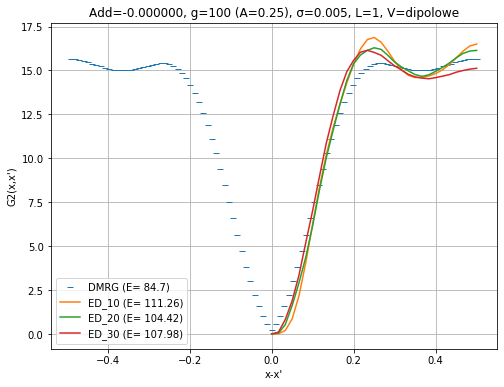

In [26]:
plt.figure(figsize=[8,6])
####################################################
plotG2FromDMRG("DMRG","g100.00_fdd0.000_M96_N4__")
# plotG2FromFile("ED_10","n4_pmax10_ptot0_A0.250000_ADD-0.000000_sigma0.010000_r0.000000_neig1_m250.txt")
# plotG2FromFile("ED_20","n4_pmax20_ptot0_A0.250000_ADD-0.000000_sigma0.010000_r0.000000_neig1_m250.txt")
# plotG2FromFile("ED_30","n4_pmax30_ptot0_A0.250000_ADD-0.000000_sigma0.010000_r0.000000_neig1_m250.txt")
# plotG2FromFile("ED_40","n4_pmax40_ptot0_A0.250000_ADD-0.000000_sigma0.010000_r0.000000_neig1_m250.txt")
# plotG2FromFile("ED_50","n4_pmax50_ptot0_A0.250000_ADD-0.000000_sigma0.010000_r0.000000_neig1_m250.txt")
plotG2FromFile("ED_10","n4_pmax10_ptot0_A0.250000_ADD-0.000000_sigma0.005000_r0.000000_neig1_m250.txt")
plotG2FromFile("ED_20","n4_pmax20_ptot0_A0.250000_ADD-0.000000_sigma0.005000_r0.000000_neig1_m250.txt")
plotG2FromFile("ED_30","n4_pmax30_ptot0_A0.250000_ADD-0.000000_sigma0.005000_r0.000000_neig1_m250.txt")
####################################################
plt.grid()
plt.title("Add="+Add+", g=100 (A=0.25), σ=0.005, L=1, V=dipolowe")
plt.xlabel("x-x'")
plt.ylabel("G2(x,x')")
plt.legend()
plt.savefig("G2_N4_DMRG_vs_ED_1.png")
plt.show()

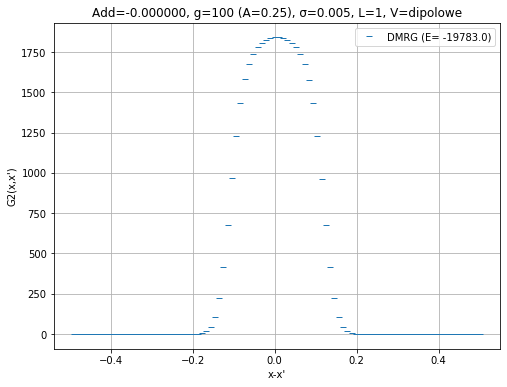

In [70]:
plt.figure(figsize=[8,6])
####################################################
plotRhoFromDMRG("DMRG","g1000.00_fdd0.500_M96_N20__")

####################################################
plt.grid()
plt.title("Add="+Add+", g=100 (A=0.25), σ=0.005, L=1, V=dipolowe")
plt.xlabel("x-x'")
plt.ylabel("G2(x,x')")
plt.legend()
plt.savefig("G2_N4_DMRG_vs_ED_1.png")
plt.show()

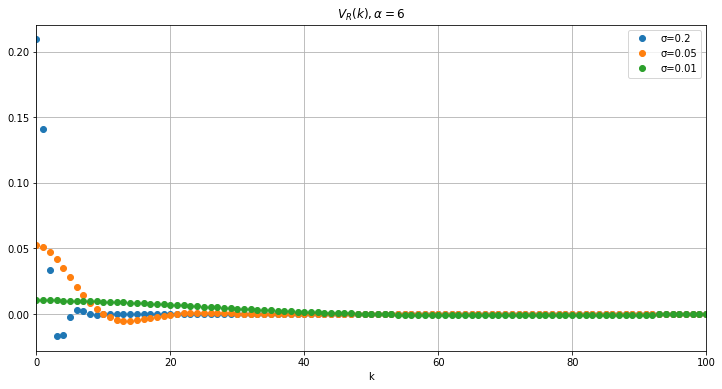

In [13]:
import matplotlib.pyplot as plt
import numpy as np

Vk02 = np.loadtxt("VkR_alpha6_sigma02")
Vk005 = np.loadtxt("VkR_alpha6_sigma005")
Vk001 = np.loadtxt("VkR_alpha6_sigma001")

plt.figure(figsize=[12,6])
plt.plot(Vk02,'o',label='σ=0.2')
plt.plot(Vk005,'o',label='σ=0.05')
plt.plot(Vk001,'o',label='σ=0.01')
plt.grid()
plt.legend()
plt.xlim([0,100])
plt.xlabel('k')
plt.title("$V_R(k), α=6$")
plt.savefig("images/VkR6.png")
plt.show()
